# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [6]:
df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df0['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

### Gather descriptive statistics about the data

In [10]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [11]:
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
cols_to_rename = {
    'last_evaluation': 'evaluation_score',
    'number_project': 'n_projects',
    'average_montly_hours' : 'avg_monthly_hrs',
    'time_spend_company': 'years_in_company', 
    'Work_accident': 'had_work_accident', 
    'promotion_last_5years': 'was_promoted_last_5yrs', 
    'Department': 'dept_name',
    'salary': 'salary_range'
}
df0.rename(columns=cols_to_rename, inplace=True)


# Display all column names after the update
df0.head()


,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs,dept_name,salary_range
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()


satisfaction_level        0
evaluation_score          0
n_projects                0
avg_monthly_hrs           0
years_in_company          0
had_work_accident         0
left                      0
was_promoted_last_5yrs    0
dept_name                 0
salary_range              0
dtype: int64

There are no missing values

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated(keep='first').sum()


3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs,dept_name,salary_range
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


There are 3008 rows that are duplicated across all of the columns, which is unlikely. So it's safer to drop these rows

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs,dept_name,salary_range
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

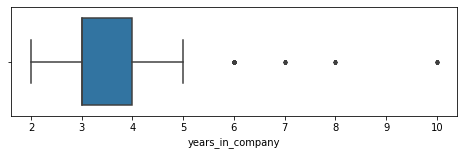

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
default_figure_size = (8,2)
default_flier_size = 3
plt.figure(figsize=default_figure_size)
sns.boxplot(x=df['years_in_company'], fliersize=default_flier_size)



In [15]:
# Determine the number of rows containing outliers
df[df['years_in_company'] > 5].shape



(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


Around 17% of employees left the company and 83% stayed. This makes the dataset imbalanced, and that needs to be taken into account

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

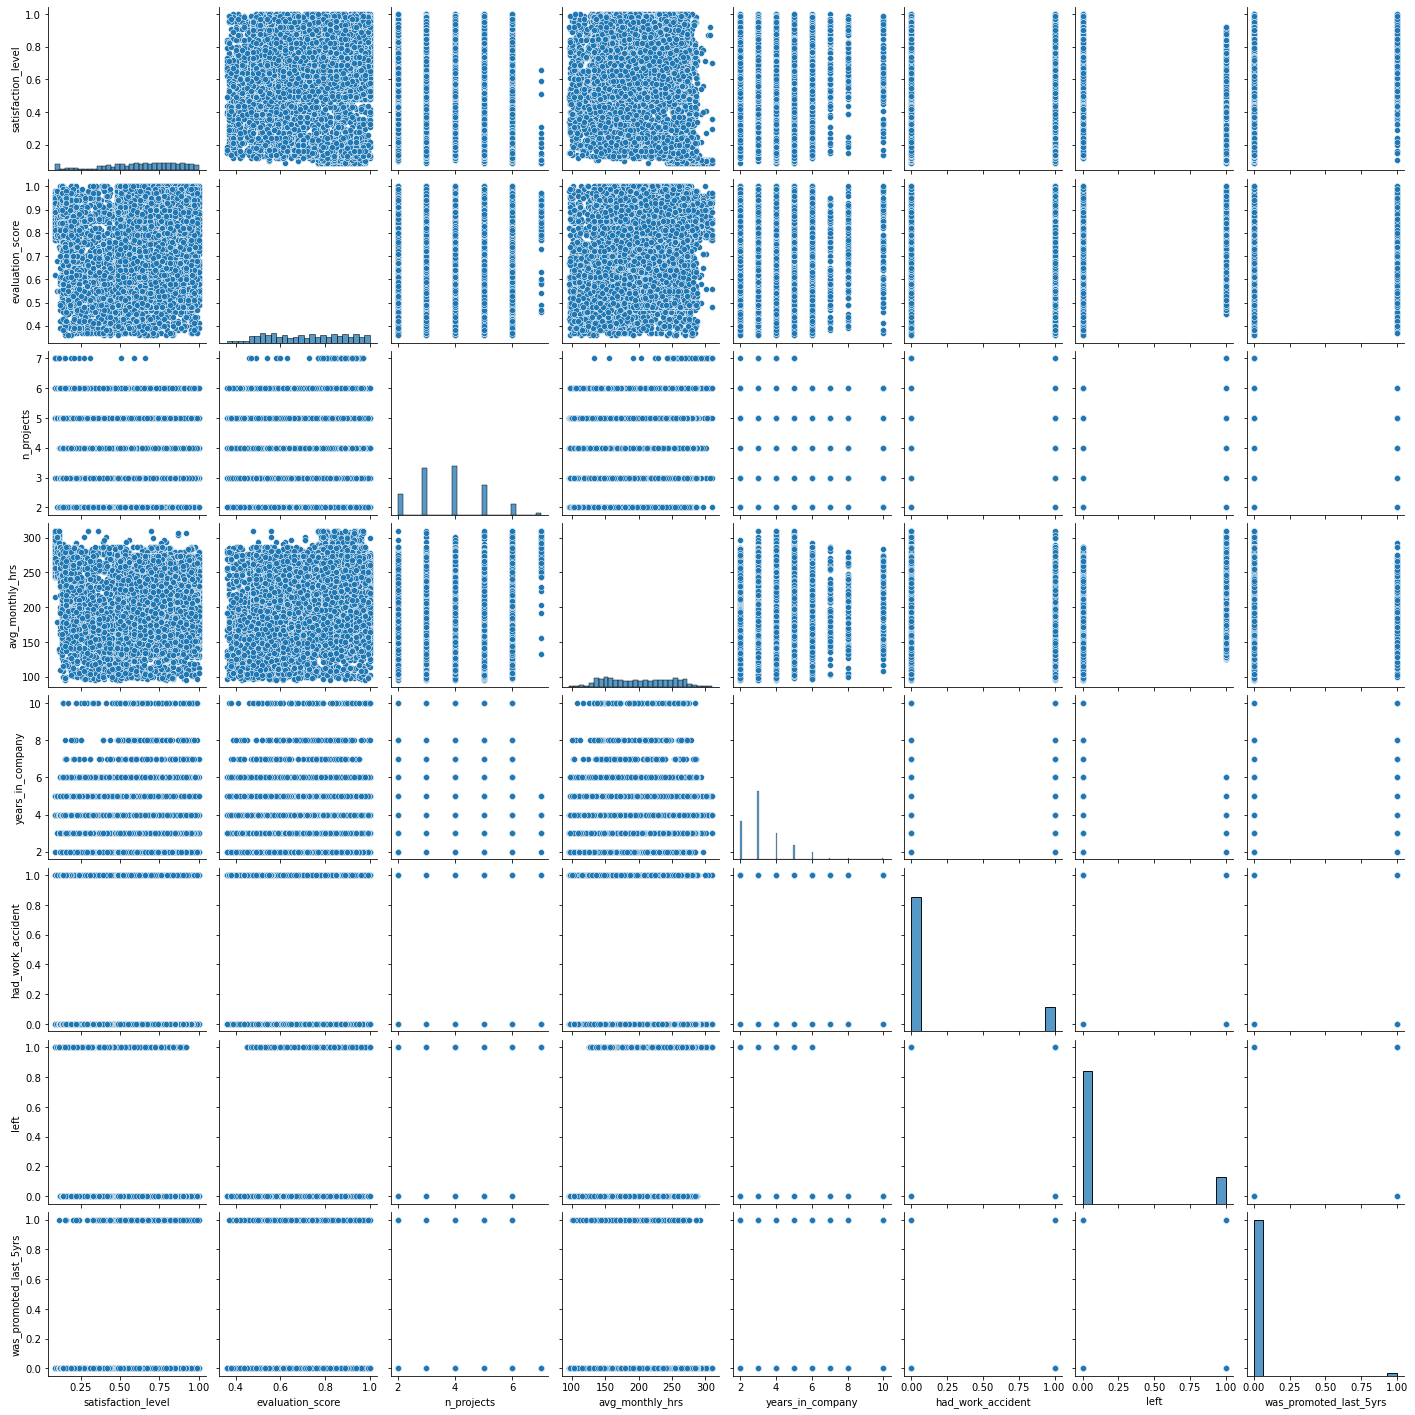

In [17]:
sns.pairplot(df)


Although I got a huge pairplot and it's not exactly useful when there are so many binary variables,  it's a way to extract some quick insights on how to approach the dataset, e.g.:
* very low percentage of employees were promoted in the last 5 years
* people with 7 projects have lower satisfaction levels, and there are no such people among those who stayed in the company and appears that they tend to leave after 4 years (they are a very small group though)

In [18]:
empl_7_projects = df[df['n_projects'] == 7]

empl_7_projects.describe()

,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs
count,145.000000,145.000000,145.0,145.000000,145.000000,145.000000,145.0,145.0
mean,0.116690,0.863517,7.0,275.620690,4.110345,0.013793,1.0,0.0
std,0.074806,0.097322,0.0,27.596817,0.426830,0.117036,0.0,0.0
min,0.090000,0.460000,7.0,133.000000,2.000000,0.000000,1.0,0.0
25%,0.100000,0.830000,7.0,260.000000,4.000000,0.000000,1.0,0.0
50%,0.100000,0.880000,7.0,281.000000,4.000000,0.000000,1.0,0.0
75%,0.110000,0.930000,7.0,296.000000,4.000000,0.000000,1.0,0.0
max,0.660000,0.970000,7.0,310.000000,5.000000,1.000000,1.0,0.0


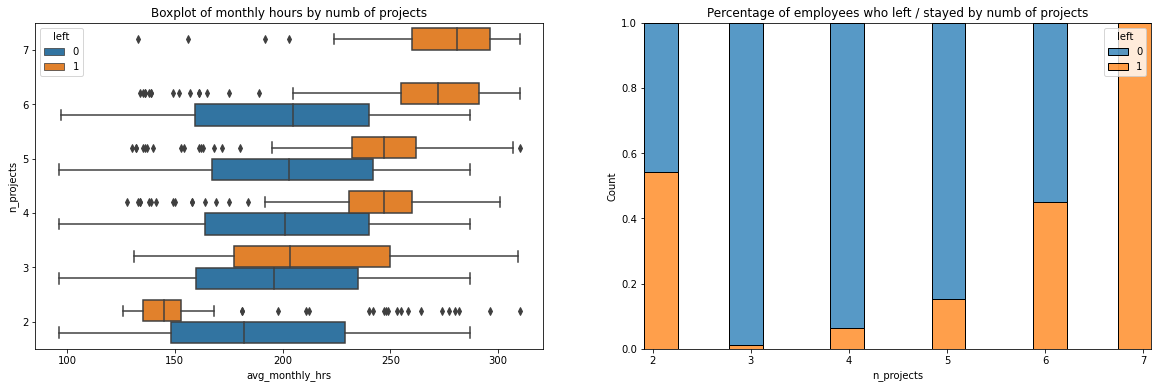

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.boxplot(data=df, x='avg_monthly_hrs', y='n_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Boxplot of monthly hours by numb of projects')

sns.histplot(data=df, x='n_projects', hue='left', multiple='fill', shrink=2, ax=ax[1])
ax[1].set_title('Percentage of employees who left / stayed by numb of projects')

# Display the plots
plt.show()

With the mean monthly hours being around 201h, the means of those who left in groups 4 to 7 are signigiantly higher, indicating the people might have been majorly overworked.

The opposite seems to be the case for people with only one project: more than 50% of them left, and among them the mean monthly hours are low compared to the rest of the groups. Maybe this group was underworked and unable to realise their potential.

Employees with 3 to 5 projects exhibit the lowest rates of leaving the company, and their monthly hour means are the closest to the overall mean (but note that they comprise most of the dataset)

Text(0.5, 1.0, 'Histogram of salary range stayed / left')

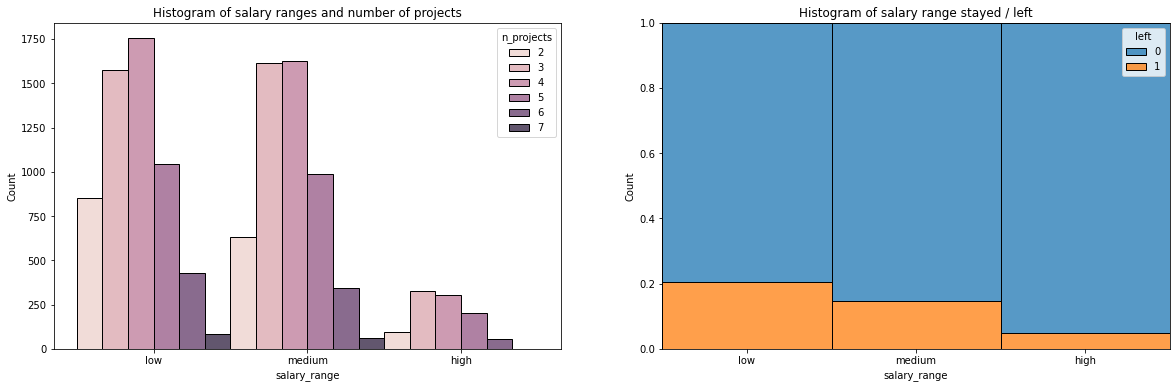

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.histplot(data=df, x='salary_range', hue='n_projects', multiple='dodge', ax=ax[0])
ax[0].set_title('Histogram of salary ranges and number of projects')

sns.histplot(data=df, x='salary_range', hue='left', multiple='fill', ax=ax[1])
ax[1].set_title('Histogram of salary range stayed / left')

In [58]:
def get_percent_groups_df(df: pd.DataFrame, column: str, column_vals: list, index:str, ind_vals:list) -> pd.DataFrame:
    new_df = pd.DataFrame(columns=column_vals, index=ind_vals)
    for col_val in column_vals:
        for ind_val in ind_vals:
            subdf = df[df[column] == col_val]
            subdf_n = subdf.shape[0]
            subdf_by_ind_n = subdf[subdf[index] == ind_val].shape[0]
            percentage = round(subdf_by_ind_n/subdf_n, 2)
            new_df.at[ind_val, col_val] = percentage
    return new_df

In [59]:
salary_ranges = ['low', 'medium', 'high']
n_projects = [2, 3, 4, 5, 6, 7]
get_percent_groups_df(df, 'salary_range', salary_ranges, 'n_projects', n_projects)

,low,medium,high
2,0.15,0.12,0.1
3,0.27,0.31,0.33
4,0.31,0.31,0.31
5,0.18,0.19,0.2
6,0.07,0.07,0.06
7,0.01,0.01,0.0


Salary range does not seem to correlate with the number of projects. So people responsible for more projects do not earn more. In fact, the distribution of project is similar among all salary ranges. These variable follow a  distribution that is approx normal.
Still, lower percentages of employees with salary on the higher end tend to leave the company.

Text(0.5, 1.0, 'Monthly hours by satisfaction score')

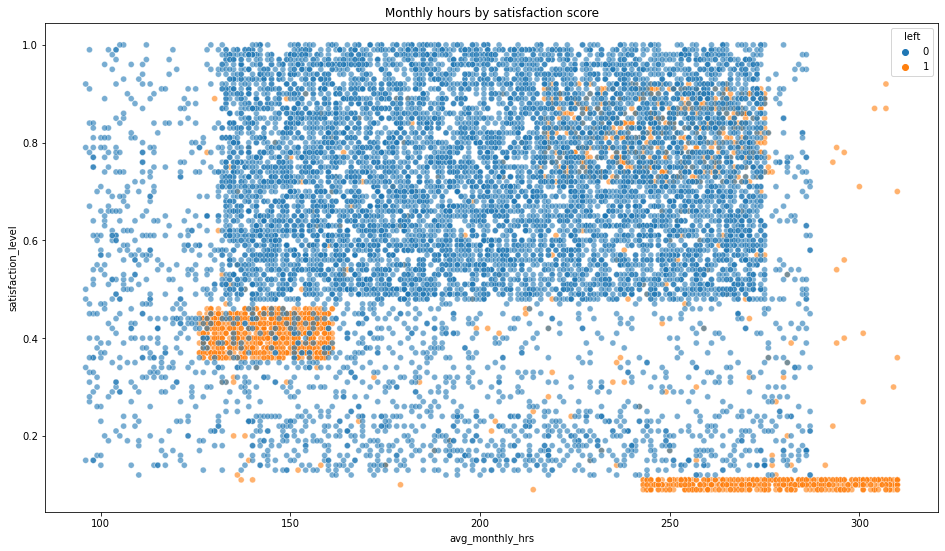

In [46]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='satisfaction_level', hue='left', alpha=0.6)

plt.title('Monthly hours by satisfaction score')


We see two clear groups of people who left:
* those who worked from 240-300+ hours and had very low satisfaction score
* those who worked fewer hours and had the satisfaction score around 0.4, which is still rather low

There is also a less dense one where noth satisfaction levelsand hours are generally high, and people left the company. 
Also notice how after 280-290 hours people left no matter their satisfaction score

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

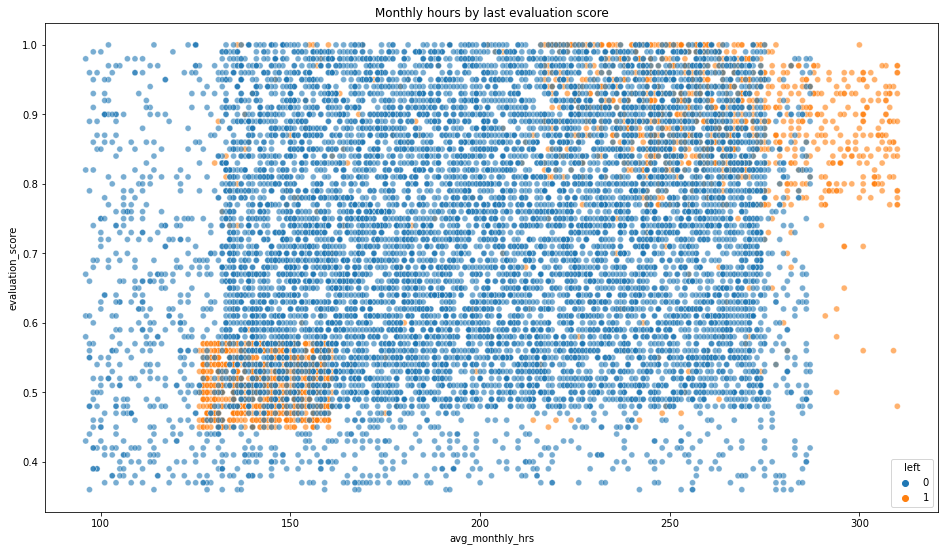

In [47]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='evaluation_score', hue='left', alpha=0.6)

plt.title('Monthly hours by last evaluation score')


From the plot above we see that there is a tight cluster of people who got low evaluation scores and worked way under 200h per month.
What is maybe more interesting is that there is a group of high-performing and apparently overworked employees who left. 

Now let's look at years in the company 

In [64]:
possible_tenure_vals = list(df['years_in_company'].unique())
possible_tenure_vals.sort()
possible_tenure_vals

[2, 3, 4, 5, 6, 7, 8, 10]

In [66]:
get_percent_groups_df(df, 'salary_range', salary_ranges, 'years_in_company', possible_tenure_vals).head(10)


,low,medium,high
2,0.24,0.24,0.26
3,0.44,0.43,0.42
4,0.17,0.17,0.15
5,0.1,0.09,0.06
6,0.04,0.05,0.05
7,0.0,0.01,0.02
8,0.01,0.01,0.01
10,0.0,0.01,0.03


People who have worked longer in this company do not earn disproportionately more that the rest of the employees.

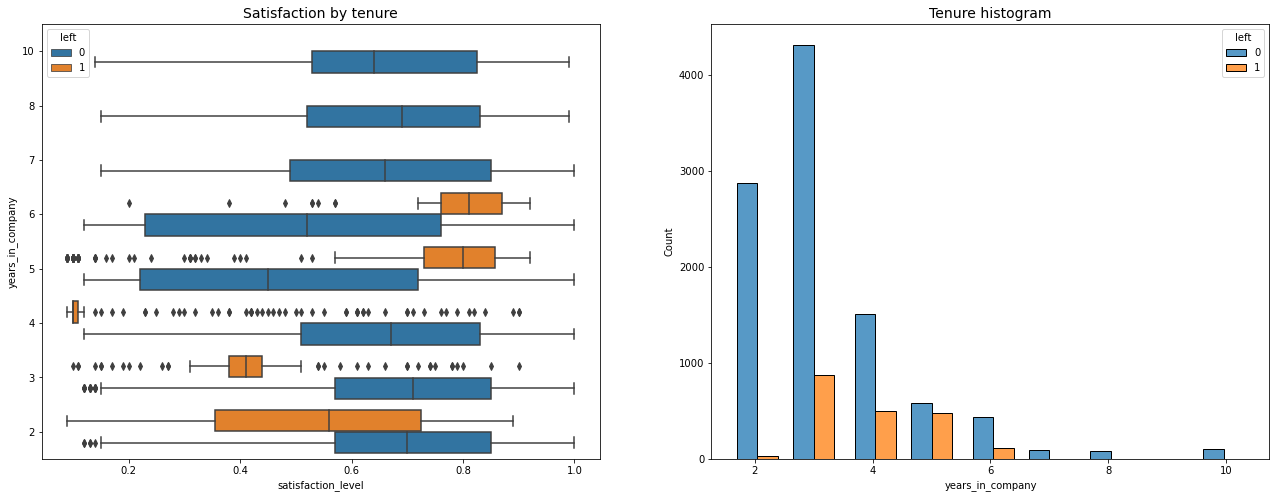

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x='satisfaction_level', y='years_in_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')


sns.histplot(data=df, x='years_in_company', hue='left', multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

In [78]:
df['dept_name'].value_counts(normalize=True)

sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: dept_name, dtype: float64

In [76]:
df[df['years_in_company'] > 6]['dept_name'].value_counts(normalize=True)

sales          0.382979
management     0.216312
marketing      0.074468
support        0.067376
IT             0.067376
product_mng    0.063830
technical      0.056738
accounting     0.042553
RandD          0.017730
hr             0.010638
Name: dept_name, dtype: float64

###### Some things we can observe:
- Employees who left fall into two general categories: dissatisfied employees who worked 2-4 years and very satisfied employees with medium-length tenures.
- There is an unusual group of four-year employees who left and whose satisfaction score was the lowest of all. Something might have happened in the company at that time and it is worth investigating that.
- The longest-tenured employees (>6 years) didn't leave. Their satisfaction levels are similar to those of newer employees
- There are not many employees who worked over 6 years. What is interesting is that they are not generally paid higher, so they are probably not top or executive-level employees, although 21% of them are in managerial roles. What might play a significant role in their incentive to stay?

There are a lot of variables so this could be endless. 
Last thing is to look at the departments. Is the rate of leaving in some department is significanly higher than in the others?

Text(0.5, 1.0, 'Percentages of employees who stayed/left by department')

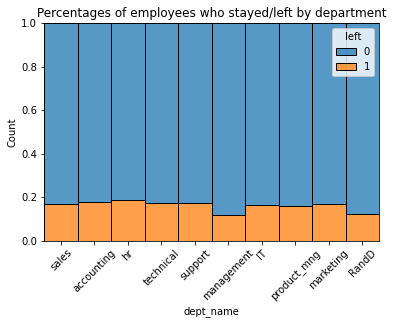

In [81]:
sns.histplot(x=df['dept_name'], hue=df['left'], multiple='fill')
plt.xticks(rotation='45')
plt.title('Percentages of employees who stayed/left by department')

The proportions are more or less uniform, no department has had an exodus.

Let's build a correlation matrix to explore further.

In [82]:
df.corr()

,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
evaluation_score,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
n_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avg_monthly_hrs,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
years_in_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
had_work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
was_promoted_last_5yrs,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

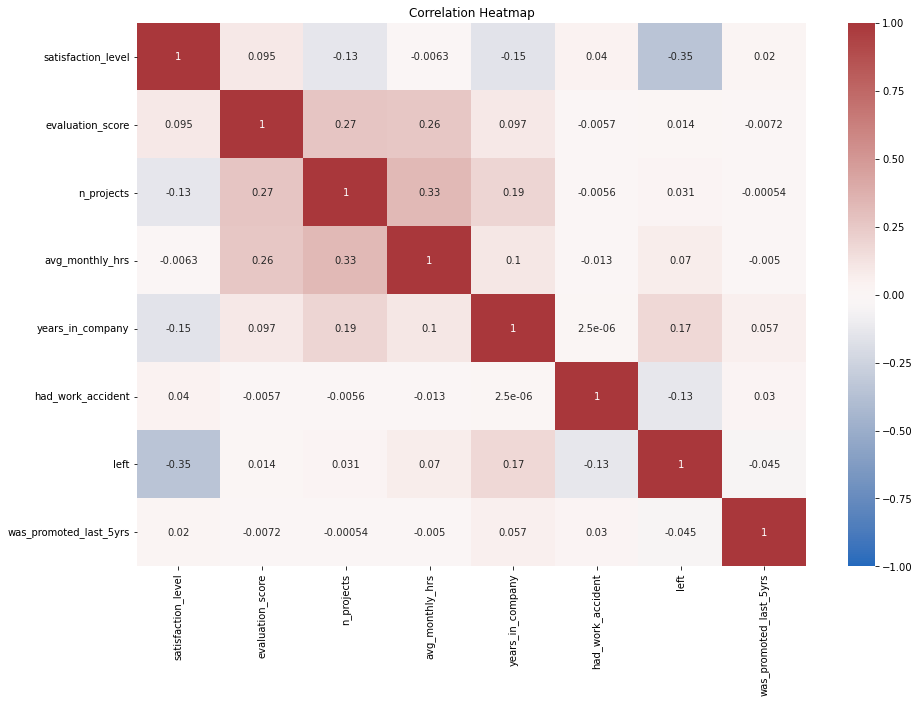

In [84]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap',)

According to the correlation matrix, none of the variables seem to be highly correlated. The highest scoring pairs are:
* `left` and `satisfaction_level` are negatively correlated: so it might be a valuable predictor
* average monthly hours and the number of projects are positively correlated, which seems logical

### Insights

There seems to be a problem with the workload and its management: leaving seems to be tied to working hours, the number of projects and low levels of satisfaction.
At the same time, only a tiny fraction of employees got a promotion.

It is important to note that the company has already lost high-performing (in terms of both the evaluation score and monthly hours) employees: they scored over 0.8 in the evaluation. At the same time they worked more than 280 hours a month, and a lot of people who worked so much left despite having reported high satisfaction marks. So it is safe to assume they have experienced a burnout.

This goes for the entire company, since there is hardly any difference between the proportions of people who left among the company's departments.

## Step 3. Model Building


### Identify the type of prediction task.

It's categorisation: we need to predict whether the employee will quit or not. Also, we need to find the most contributing factors to quitting so that th company can implement changes

### Identify the types of models most appropriate for this task.

Logistic regression, Naive Bayes, Tree-based

I think we need to try tree-based models, because they are not sensitive to outliers (and I'm not quite sure ifm for example, we should consider a small group of employees with >6 years of work as outliers)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [87]:
df['salary_code'] = (
    df['salary_range'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [ ]:
df.drop(columns=['salary_range'], inplace=True)

In [90]:
df = pd.get_dummies(df, prefix="dept")

In [96]:
df.head()

,satisfaction_level,evaluation_score,n_projects,avg_monthly_hrs,years_in_company,had_work_accident,left,was_promoted_last_5yrs,salary_code,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
df.shape

(11991, 19)

In [176]:
df.to_csv("encoded_dataset.csv")

In [98]:
y = df['left']
X = df.drop(columns=['left'])

In [104]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=912)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=912)


### DecisionTreeClassifier

In [108]:
tree_cl = DecisionTreeClassifier(random_state=912)
cv_params = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
grid_search_tree = GridSearchCV(tree_cl, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [109]:
%%time
grid_search_tree.fit(X_train, y_train)

CPU times: user 2.75 s, sys: 858 µs, total: 2.75 s
Wall time: 2.75 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=912,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                        

In [111]:
grid_search_tree.best_score_

0.9711233619544408

In [116]:
grid_search_tree.best_estimator_.feature_importances_

array([0.4977305 , 0.17895335, 0.12745523, 0.07264562, 0.12231218,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00090311])

In [119]:
def show_tree(tree, max_depth=None):
    default_max_depth = 6
    max_depth = max_depth or default_max_depth
    plt.figure(figsize=(80,30))
    plot_tree(tree, max_depth=max_depth, fontsize=14, feature_names=X.columns, 
              class_names={0:'stayed', 1:'left'}, filled=True)
    plt.show()


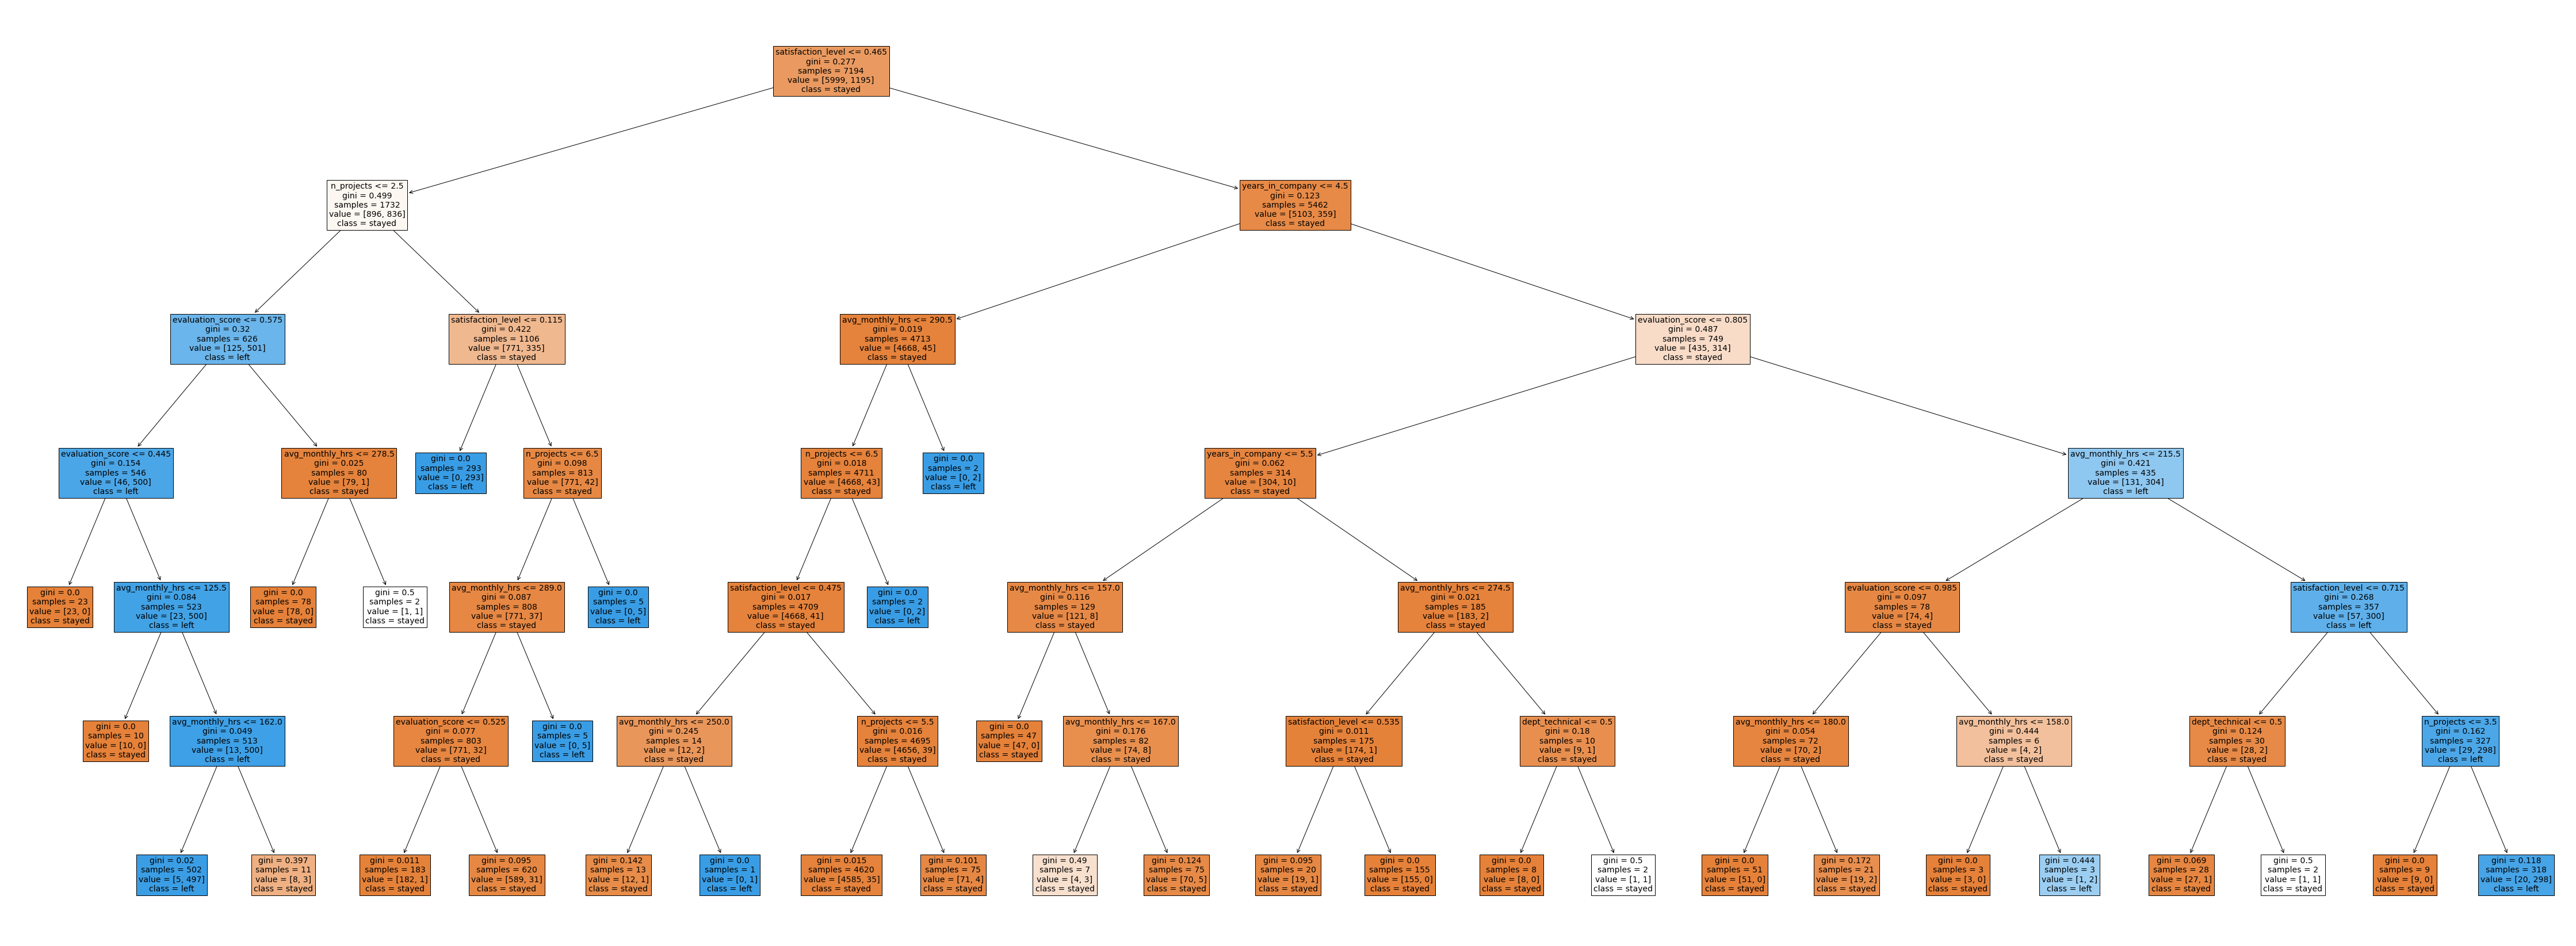

In [120]:
show_tree(grid_search_tree.best_estimator_)

In [152]:
def make_results_for_train(model_name, model_object, refit_metric):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
        }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[refit_metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    model_name += ": train"
  
    # Create table of results
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
        })
  
    return table

def make_results_for_test(model_name, model, X_test_data, y_test_data, is_validation=False):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    if is_validation:
        model_name += ": validation"
    else:
        model_name += ": test"
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision], 
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
        })
  
    return table

In [180]:
tree_model_name = "Decision Tree"
model_results = make_results_for_train(tree_model_name, grid_search_tree, "auc")
results_on_test = make_results_for_test(tree_model_name, grid_search_tree, X_test, y_test)
model_results = pd.concat([model_results, results_on_test], axis=0)


In [181]:
model_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree: train,0.966527,0.917165,0.941089,0.980957,0.971123
0,Decision Tree: test,0.970899,0.922111,0.945876,0.982493,0.958307


### Random Forest

In [138]:
rf = RandomForestClassifier(random_state=0)
cv_params = {
    'max_depth': [3, 5, 8, None], 
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [300, 500],
}  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

grid_search_rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [139]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [151]:
grid_search_rf.best_score_

0.9818208914308065

In [182]:
tree_model_name = "Random Forest"
results_on_train = make_results_for_train(tree_model_name, grid_search_rf, "auc")
results_on_test = make_results_for_test(tree_model_name, grid_search_rf, X_test, y_test)
model_results = pd.concat([model_results, results_on_train, results_on_test], axis=0)

In [183]:
model_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree: train,0.966527,0.917165,0.941089,0.980957,0.971123
0,Decision Tree: test,0.970899,0.922111,0.945876,0.982493,0.958307
0,Random Forest: train,0.971290,0.907129,0.937982,0.980123,0.981821
0,Random Forest: test,0.973404,0.919598,0.945736,0.982493,0.957300


I got two models whose metrics are quite high, with random forest performing slightly better. I think it is really important for a chosen model to have low FN. For this, recall is an important metric.
Of course, whis depends on the action the company will decide to take once an employee is predicted to leave. If the decision is to consider giving them a raise, the cost of FPs is a burden on a budget. But if they'll implement first some non-monetary actions, like a screening / a survey, it will not be even beneficial to collect info from FPs too to decide how to proceed further.

Both models metrics are very close. Since Desicion Tree's recall and AUC are ever so slightly higher, so we can choose it to test performance on a validation set.

In [184]:
results_on_validation = make_results_for_test("Decision Tree", grid_search_tree, X_val, y_val, is_validation=True)
model_results = pd.concat([model_results, results_on_validation], axis=0)
model_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree: train,0.966527,0.917165,0.941089,0.980957,0.971123
0,Decision Tree: test,0.970899,0.922111,0.945876,0.982493,0.958307
0,Random Forest: train,0.971290,0.907129,0.937982,0.980123,0.981821
0,Random Forest: test,0.973404,0.919598,0.945736,0.982493,0.957300
0,Decision Tree: validation,0.973262,0.914573,0.943005,0.981651,0.954786


Decent performance on the validation set too. I'll save the model and the results

In [185]:
model_results.to_csv('model_res_comparison.csv')

In [160]:
with open('decision_tree.pickle', 'wb') as to_write:
    pickle.dump(grid_search_tree, to_write)

### Feature importances
Let's see what features were considered as the most important

In [172]:
def get_feature_importance_df(feature_importances_arr): 
    feature_importance_df = pd.DataFrame(
                                feature_importances_arr, 
                                columns=['gini_importance'],
                                index=X.columns
                                )
    feature_importance_df.sort_values(by='gini_importance', ascending=False, inplace=True)
    feature_importance_df = feature_importance_df[feature_importance_df['gini_importance'] != 0]
    return feature_importance_df

Just out of curiosity, let's compare features of both models

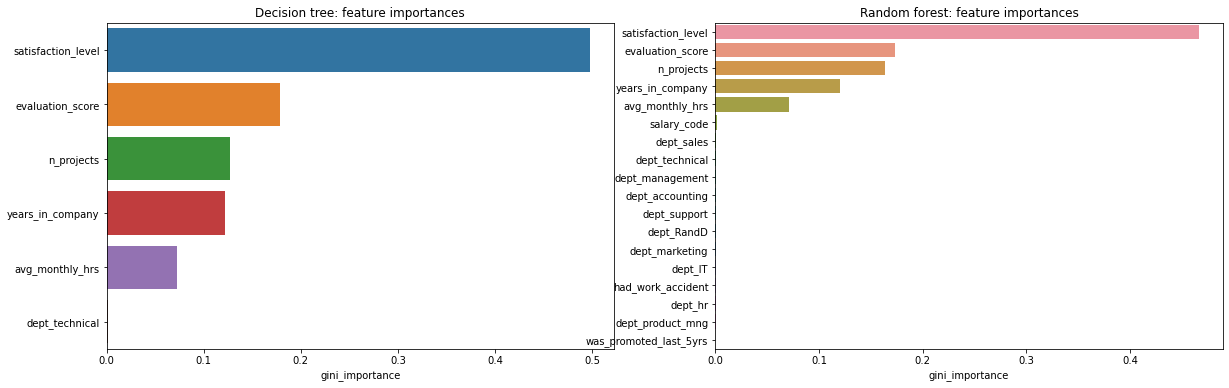

In [175]:
tree_feats = get_feature_importance_df(grid_search_tree.best_estimator_.feature_importances_)
rf_feats = get_feature_importance_df(grid_search_rf.best_estimator_.feature_importances_)
x_col = 'gini_importance'
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.barplot(x=tree_feats[x_col], y=tree_feats.index, ax=ax[0])
ax[0].set_title('Decision tree: feature importances')

sns.barplot(x=rf_feats[x_col], y=rf_feats.index, ax=ax[1])
ax[1].set_title('Random forest: feature importances')


plt.show()


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Decision Tree outperformed Random Forest by a very tiny margin, and demonstrated the following metrics on the validation set:

In [187]:
model_results.iloc[-1]

model        Decision Tree: validation
precision                     0.973262
recall                        0.914573
F1                            0.943005
accuracy                      0.981651
AUC                           0.954786
Name: 0, dtype: object

The most important features turned out to be satisfaction, evaluation score, number of projects, number of years in the company, and average monthly hours, in that order (cf the barplot above)

### Conclusion, Recommendations, Next Steps

Since the most important feature is the satisfaction level,  it would be beneficial to look into the problems indicated in the responses. **Maybe this feature can be divided into multiple more precise ones, or we can build a model without it (since it does not indicate a root cause for (dis)satisfaction**

Also, it it very important to address the issue of overworking.
Firstly, consider taking the load off the employees who work more that 250 or even 200 hours, especially if they have more than 5 projects.

Consider implementing changes to the company policy:
* fix the maximum number of projects that an employee can work on (4-5)
* do not require employees to take longer hours or introduce a fair overtime policy
* change the company's promotion policy so that a promotion is more attainable

Initiate an open discussion about these changes with the employees, explain the changes to be implemented and take into account to their opinions